**Work Flow** </br>
Loading all the required modeules. </br>
Inspecting data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data=pd.read_csv("data.csv")
print(data.shape)

(1000, 17)


Dataset contains 1000 rows and 17 columns. 

In [4]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Checking if we have any null values and counting them.

In [5]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Dataset contains no null values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


We have a gender column that contains the gender of the buyers.

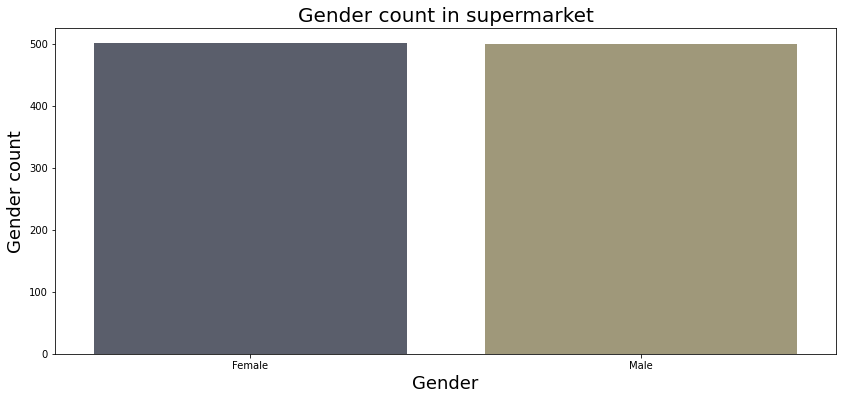

In [8]:
plt.figure(figsize=(14,6))
#plt.style.use('fivethirtyeight')
ax= sns.countplot('Gender', data=data , palette = 'cividis')
ax.set_xlabel(xlabel= "Gender",fontsize=18)
ax.set_ylabel(ylabel = "Gender count", fontsize = 18)
ax.set_title(label = "Gender count in supermarket", fontsize = 20)
plt.show()

From this visualization its hard to tell any difference. 49% of people are men and 51% is women entering the store.

We check the total column with respect to gender. Total column represents the amount of money people spend when the enter the store. 

In [9]:
data['Gender'][10 : 20]

10    Female
11      Male
12    Female
13      Male
14    Female
15    Female
16    Female
17      Male
18      Male
19    Female
Name: Gender, dtype: object

In [10]:
data['Total'][10 : 20]

10     60.8160
11    107.1420
12    246.4875
13    453.4950
14    749.4900
15    590.4360
16    506.6355
17    457.4430
18    172.2105
19     84.6300
Name: Total, dtype: float64

In [11]:
data.groupby(['Gender']). agg({'Total':'sum'})

,Total
Gender,
Female,167882.925
Male,155083.824


So women spend more money as compared to the opposite gender.

We have a column named customer type. Lets see what are the different customer types.

In [12]:
data['Customer type'].value_counts()


Member    501
Normal    499
Name: Customer type, dtype: int64

So we have almost same number of customer types. We can check who spends more money members or non-members.

In [13]:
data.groupby(['Customer type']). agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


**Member** Spend more money. Now i will check the total sales with respect to each city. 

In [14]:
data['City'].value_counts().sort_values(ascending = False)

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

Almost the same number of sales in each city not a huge difference.

Now we can check the famous products that are sold often.

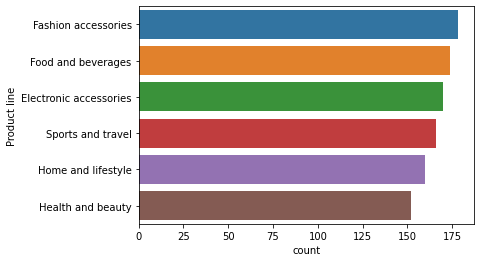

In [15]:
sns.countplot(y = 'Product line', data=data, order = data['Product line'].value_counts().index )

People spend more money on fashion, food and drinks, and electronics product as compared to the other products.

We can see which gender spends most on the each of the product line.

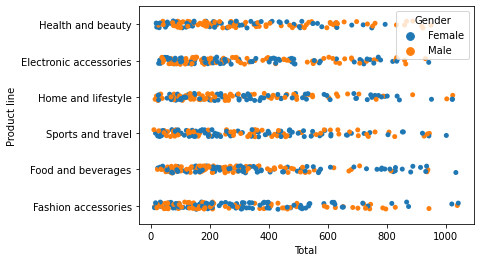

In [16]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=data )

Let see how customers make payment.

Text(0.5, 1.0, 'Payment Channel')

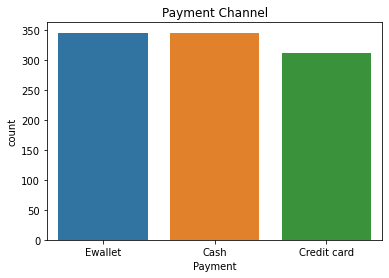

In [17]:
 sns.countplot(x="Payment", data =data).set_title("Payment Channel")

So Ewallet and cash payment is popular method for payment. 

We can also see the distribution of each payment method with respect to 

Text(0.5, 1.0, 'Payment Channel by City')

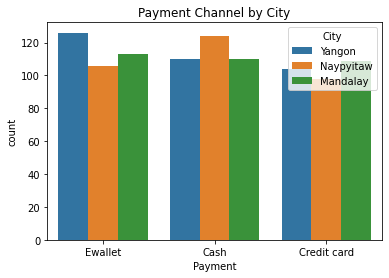

In [18]:
sns.countplot(x="Payment", hue = "City", data =data).set_title("Payment Channel by City") 

Cash payment method is highest in the Naypyitaw city.

We have a cloumn named time and quantity. We can check the busy hour or rush hour when more products are sold during the day time.

In [19]:
data["Time"][10:20]

10    18:07
11    17:03
12    10:25
13    16:48
14    19:21
15    16:19
16    11:03
17    10:39
18    18:00
19    15:30
Name: Time, dtype: object

In [20]:
data['Quantity'][10:20]

10     4
11     4
12     5
13    10
14    10
15     6
16     7
17     6
18     3
19     2
Name: Quantity, dtype: int64

In [21]:
# Convert the values in date with time 
data["date_time"]= pd.to_datetime(data["Time"])

In [22]:
data["date_time"][10:20]

10   2020-07-18 18:07:00
11   2020-07-18 17:03:00
12   2020-07-18 10:25:00
13   2020-07-18 16:48:00
14   2020-07-18 19:21:00
15   2020-07-18 16:19:00
16   2020-07-18 11:03:00
17   2020-07-18 10:39:00
18   2020-07-18 18:00:00
19   2020-07-18 15:30:00
Name: date_time, dtype: datetime64[ns]

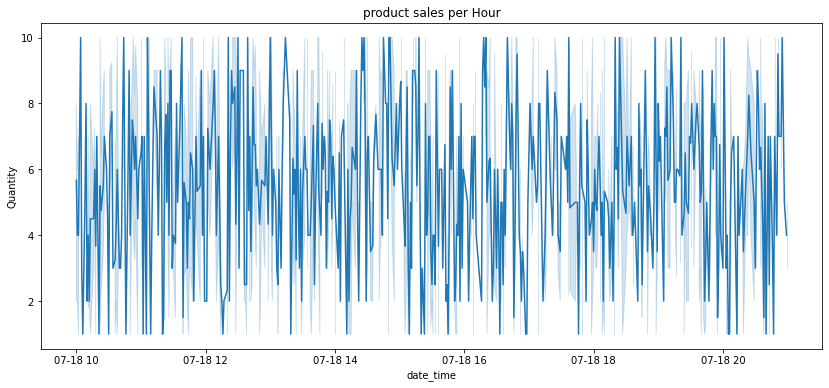

In [23]:
plt.figure(figsize=(14,6)) 
SalesTime = sns.lineplot(x="date_time", y ="Quantity", data = data).set_title("product sales per Hour")

Not a very understandable result. Now here we can convert the date_and time column to only hours i.e 12:00 - 24:00

In [24]:
#Convert it into hour.
data["Hour"]= (data["date_time"]).dt.hour

In [25]:
# Now we have the values in the format of hours like 1 -24
data['Hour'][1:20] 

1     10
2     13
3     20
4     10
5     18
6     14
7     11
8     17
9     13
10    18
11    17
12    10
13    16
14    19
15    16
16    11
17    10
18    18
19    15
Name: Hour, dtype: int64

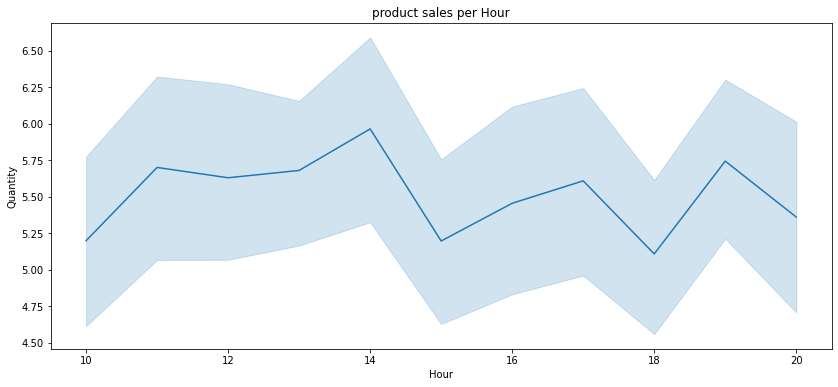

In [26]:
plt.figure(figsize=(14,6)) 
SalesTime = sns.lineplot(x="Hour", y ="Quantity", data = data).set_title("product sales per Hour")

That's more clear so most quantity of products are sold around 14.00 or (2:00 pm)

**Prophet** 
Prophet is a procedure for forecasting time series data.  It works best with daily periodicity data with at least one year of historical data. Prophet is robust to missing data, shifts in the trend, and large outliers. 

In [28]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,date_time,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2020-07-18 13:08:00,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2020-07-18 10:29:00,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2020-07-18 13:23:00,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2020-07-18 20:33:00,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2020-07-18 10:37:00,10


I will try to make the model by selecting the date and the gross income. 

In [88]:
# Converting to the required format
data['Date'] = pd.to_datetime(data["Date"]).dt.strftime('%Y-%m-%d')
data['Date']
df.sort('Date') 

0      2019-01-05
1      2019-03-08
2      2019-03-03
3      2019-01-27
4      2019-02-08
          ...    
995    2019-01-29
996    2019-03-02
997    2019-02-09
998    2019-02-22
999    2019-02-18
Name: Date, Length: 1000, dtype: object

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column must contain a date or datetime (either is fine). The y column must be numeric, and represents the measurement we wish to forecast.

In [121]:
new_dataset= data[['Date','Total']]
new_dataset = new_dataset.sort_values(by='Date').reset_index(drop=True) 

new_dataset.columns = ['ds', 'y']


In [129]:
new_dataset.head(60)

,ds,y
0,2019-01-01,177.4080
1,2019-01-01,621.2430
2,2019-01-01,399.7560
3,2019-01-01,113.5680
4,2019-01-01,132.0270
...,...,...
55,2019-01-07,71.5260
56,2019-01-07,85.7430
57,2019-01-07,575.9775
58,2019-01-07,374.3880


In [128]:
new_dataset.tail(20)

,ds,y
980,2019-03-28,209.1180
981,2019-03-29,321.7725
982,2019-03-29,527.5095
983,2019-03-29,228.1230
984,2019-03-29,864.5700
...,...,...
995,2019-03-30,918.7290
996,2019-03-30,85.5120
997,2019-03-30,304.9830
998,2019-03-30,469.7700


In [135]:
m = Prophet()
m.fit(new_dataset)
#Period Represents the number of the days we want to make predictions 365 in cae of year. We will just predict for a month
future = m.make_future_dataframe(periods=10)
future.shape
#forecast = m.predict(future)
#forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


(1010, 1)

In [136]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,331.068904,20.583471,651.971203,331.068904,331.068904,3.273421,3.273421,3.273421,3.273421,3.273421,3.273421,0.0,0.0,0.0,334.342324
1,2019-01-01,331.068904,18.689904,652.985149,331.068904,331.068904,3.273421,3.273421,3.273421,3.273421,3.273421,3.273421,0.0,0.0,0.0,334.342324
2,2019-01-01,331.068904,25.997650,654.096279,331.068904,331.068904,3.273421,3.273421,3.273421,3.273421,3.273421,3.273421,0.0,0.0,0.0,334.342324
3,2019-01-01,331.068904,15.842961,647.272154,331.068904,331.068904,3.273421,3.273421,3.273421,3.273421,3.273421,3.273421,0.0,0.0,0.0,334.342324
4,2019-01-01,331.068904,5.714796,672.424485,331.068904,331.068904,3.273421,3.273421,3.273421,3.273421,3.273421,3.273421,0.0,0.0,0.0,334.342324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,2019-04-05,312.557940,-1.210786,642.920137,312.557743,312.558097,-5.819390,-5.819390,-5.819390,-5.819390,-5.819390,-5.819390,0.0,0.0,0.0,306.738551
1006,2019-04-06,312.360687,25.816004,674.338094,312.360436,312.360896,20.023571,20.023571,20.023571,20.023571,20.023571,20.023571,0.0,0.0,0.0,332.384258
1007,2019-04-07,312.163434,9.403119,640.196608,312.163114,312.163697,11.808630,11.808630,11.808630,11.808630,11.808630,11.808630,0.0,0.0,0.0,323.972063
1008,2019-04-08,311.966180,-15.674625,591.378240,311.965791,311.966502,-19.134932,-19.134932,-19.134932,-19.134932,-19.134932,-19.134932,0.0,0.0,0.0,292.831248


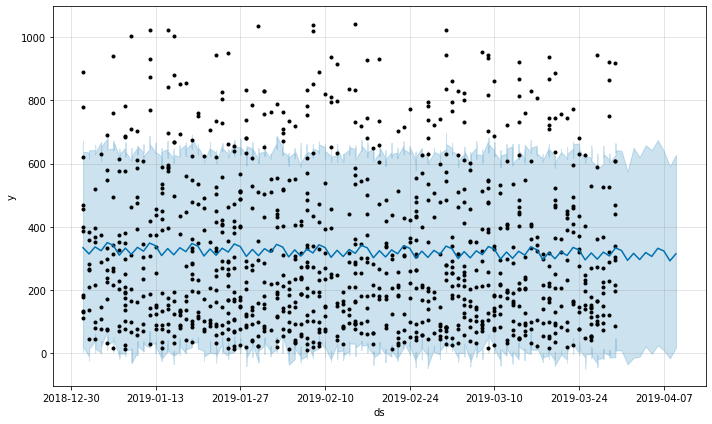

In [137]:
fig1 = m.plot(forecast)

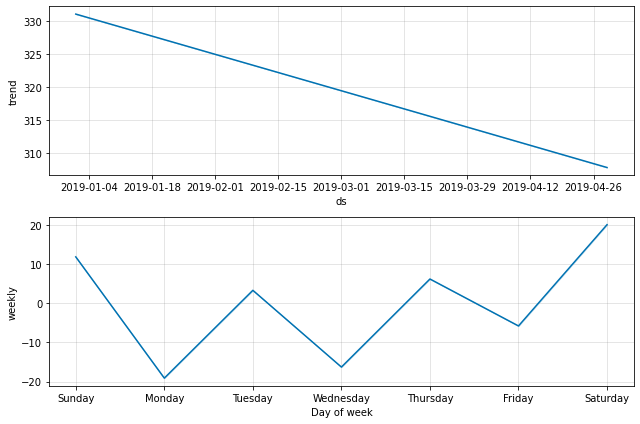

In [132]:
fig2 = m.plot_components(forecast)

In [81]:
data.tail(20)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,date_time,Hour
980,728-47-9078,C,Naypyitaw,Member,Male,Food and beverages,59.59,4,11.9180,250.2780,1/19/2019,12:46,Cash,238.36,4.761905,11.9180,9.8,2020-07-18 12:46:00,12
981,809-46-1866,A,Yangon,Normal,Male,Health and beauty,58.15,4,11.6300,244.2300,1/23/2019,17:44,Cash,232.60,4.761905,11.6300,8.4,2020-07-18 17:44:00,17
982,139-32-4183,A,Yangon,Member,Female,Sports and travel,97.48,9,43.8660,921.1860,3/14/2019,14:19,Ewallet,877.32,4.761905,43.8660,7.4,2020-07-18 14:19:00,14
983,148-41-7930,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.9860,734.7060,1/23/2019,10:33,Cash,699.72,4.761905,34.9860,6.1,2020-07-18 10:33:00,10
984,189-40-5216,C,Naypyitaw,Normal,Male,Electronic accessories,96.37,7,33.7295,708.3195,1/9/2019,11:40,Cash,674.59,4.761905,33.7295,6.0,2020-07-18 11:40:00,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,2020-07-18 13:46:00,13
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2020-07-18 17:16:00,17
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,2020-07-18 13:22:00,13
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,2020-07-18 15:33:00,15


In [180]:
# All the enteries from the last month
prediction_size = 345
train_df = new_dataset[:-prediction_size]
train_df.tail(3)

,ds,y
652,2019-02-28,176.400
653,2019-02-28,195.720
654,2019-02-28,63.315


In [182]:
# The training datset contains only values from first 2 months
train_df.shape

(655, 2)

In [184]:
#Training the model
model = Prophet()
model.fit(train_df);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [187]:
future2 = model.make_future_dataframe(periods=30)
future2.tail(n=3)

,ds
682,2019-03-28
683,2019-03-29
684,2019-03-30


In [188]:
forecast2 = model.predict(future)
forecast2.tail(n=3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
682,2019-03-28,314.921993,13.913765,623.683366,314.921963,314.922021,16.819391,16.819391,16.819391,16.819391,16.819391,16.819391,0.0,0.0,0.0,331.741383
683,2019-03-29,314.724014,-11.796349,611.442053,314.723982,314.724043,-7.286963,-7.286963,-7.286963,-7.286963,-7.286963,-7.286963,0.0,0.0,0.0,307.437051
684,2019-03-30,314.526035,-13.234051,616.788936,314.526001,314.526065,-20.433094,-20.433094,-20.433094,-20.433094,-20.433094,-20.433094,0.0,0.0,0.0,294.092941


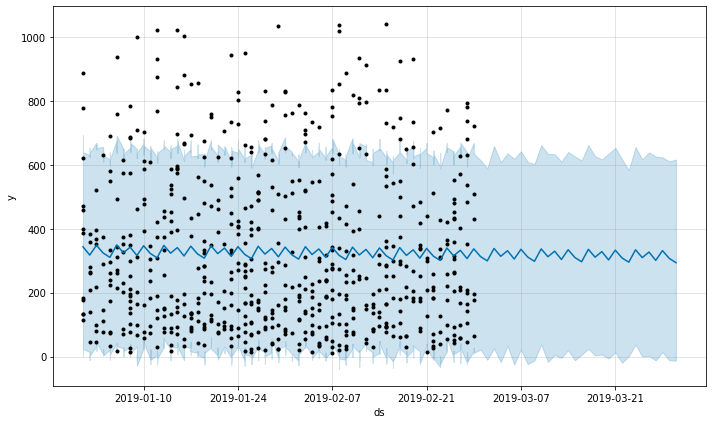

In [190]:
model.plot(forecast2);

**Lessons** </br>
1) Dataset is very small.</br>
2) There are multiple enteries for each data.</br>
   1) problem 2 can be solved by using Group BY but    dataset will shrink more.